<br>

<font size=6 color='green'>**Introdução ao PySpark**<font>

---
---

Utilizando o `PySpark` para realizar modelo de classificação.

In [1]:
# versão da linguagem python
from platform import python_version
print('[VERSION] Python:', python_version())

[VERSION] Python: 3.10.12


In [2]:
# importando a biblioteca "warnings" para ignorar mensagens de alerta
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# importando o "pyspark" e visualizando sua versão
import pyspark as ps
print('[VERSION] PySpark:', ps.__version__)

[VERSION] PySpark: 3.2.4


In [4]:
# visualizando o diretório local de trabalho
%pwd

'/home/fernandogalvao/Área de Trabalho/intro-pyspark/my-project/my_project'

In [5]:
# criando uma pasta para alocar o conjunto de dados
%mkdir data

mkdir: cannot create directory ‘data’: File exists


In [6]:
# visualizando os arquivos/pastas presente no local
%ls

01-intro.ipynb  data/  __init__.py


In [7]:
# importando o conjunto de dados para a pasta "data"
!curl https://raw.githubusercontent.com/selva86/datasets/master/bank-full.csv >> data/bank.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5698k  100 5698k    0     0  10.5M      0 --:--:-- --:--:-- --:--:-- 10.5M


In [8]:
# visualizando o conteúdo da pasta "data"
%ls data/

bank.csv


In [9]:
# visualizando o conjunto de dados
!head data/bank.csv

"age";"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
56;"housemaid";"married";"basic.4y";"no";"no";"no";"telephone";"may";"mon";261;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
57;"services";"married";"high.school";"unknown";"no";"no";"telephone";"may";"mon";149;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
37;"services";"married";"high.school";"no";"yes";"no";"telephone";"may";"mon";226;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
40;"admin.";"married";"basic.6y";"no";"no";"no";"telephone";"may";"mon";151;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
56;"services";"married";"high.school";"no";"no";"yes";"telephone";"may";"mon";307;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
45;"services";"married";"basic.9y";"unknown";"no";"no";"telephone";"may";"mon";198;1;999;0;"nonex

In [10]:
# importando o módulo/função para iniciar a sessão do "pyspark"
from pyspark.sql import SparkSession

In [11]:
# instanciando a sessão
spark_session = SparkSession\
    .builder\
    .master('local[*]')\
    .appName(name='intro-pyspark')\
    .getOrCreate()

spark_session

24/02/25 21:34:19 WARN Utils: Your hostname, fernandogalvao-Inspiron-3583 resolves to a loopback address: 127.0.1.1; using 192.168.1.42 instead (on interface wlo1)
24/02/25 21:34:19 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/25 21:34:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [12]:
# instanciando o objeto "dataframe" 
df = spark_session.read.csv(path='data/bank.csv', 
                            header=True,
                            inferSchema=True, 
                            sep=';')

# visualizando o tipo do objeto instanciado
type(df)

pyspark.sql.dataframe.DataFrame

In [13]:
# visualizando o esquema do objeto criado
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp.var.rate: double (nullable = true)
 |-- cons.price.idx: double (nullable = true)
 |-- cons.conf.idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr.employed: double (nullable = true)
 |-- y: string (nullable = true)



In [14]:
# visualizando o conjunto de dados
df

DataFrame[age: int, job: string, marital: string, education: string, default: string, housing: string, loan: string, contact: string, month: string, day_of_week: string, duration: int, campaign: int, pdays: int, previous: int, poutcome: string, emp.var.rate: double, cons.price.idx: double, cons.conf.idx: double, euribor3m: double, nr.employed: double, y: string]

In [15]:
# visualizando as 5 primeiras linhas do conjunto de dados
df.head(n=5)

[Row(age=56, job='housemaid', marital='married', education='basic.4y', default='no', housing='no', loan='no', contact='telephone', month='may', day_of_week='mon', duration=261, campaign=1, pdays=999, previous=0, poutcome='nonexistent', emp.var.rate=1.1, cons.price.idx=93.994, cons.conf.idx=-36.4, euribor3m=4.857, nr.employed=5191.0, y='no'),
 Row(age=57, job='services', marital='married', education='high.school', default='unknown', housing='no', loan='no', contact='telephone', month='may', day_of_week='mon', duration=149, campaign=1, pdays=999, previous=0, poutcome='nonexistent', emp.var.rate=1.1, cons.price.idx=93.994, cons.conf.idx=-36.4, euribor3m=4.857, nr.employed=5191.0, y='no'),
 Row(age=37, job='services', marital='married', education='high.school', default='no', housing='yes', loan='no', contact='telephone', month='may', day_of_week='mon', duration=226, campaign=1, pdays=999, previous=0, poutcome='nonexistent', emp.var.rate=1.1, cons.price.idx=93.994, cons.conf.idx=-36.4, euri

In [16]:
# utilizando o método ".show()" e passando como argumente a quantidade de linhas "n=3"
df.show(n=3)

+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|      job|marital|  education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|housemaid|married|   basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 57| services|married|high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 37| serv

In [17]:
# visualizando o tipo de dados em cada atributo
df.dtypes

[('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('month', 'string'),
 ('day_of_week', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('emp.var.rate', 'double'),
 ('cons.price.idx', 'double'),
 ('cons.conf.idx', 'double'),
 ('euribor3m', 'double'),
 ('nr.employed', 'double'),
 ('y', 'string')]

In [18]:
# contabilizando a contagem de linhas (observações) e colunas (atributos)
df.count(), len(df.columns)

(41188, 21)

In [19]:
# criando uma função para contabilizar a dimensão do conjunto de dados - linhas e colunas
def dataframe_dim(df: object):
    num_rows = df.count()
    num_cols = len(df.columns)
    return (num_rows, num_cols)

In [20]:
# aplicando a função no conjunto de dados
dataframe_dim(df)

(41188, 21)

In [21]:
# estatística descritiva do conjunto de dados
df.describe().show(vertical=True, truncate=False)

-RECORD 0-----------------------------
 summary        | count               
 age            | 41188               
 job            | 41188               
 marital        | 41188               
 education      | 41188               
 default        | 41188               
 housing        | 41188               
 loan           | 41188               
 contact        | 41188               
 month          | 41188               
 day_of_week    | 41188               
 duration       | 41188               
 campaign       | 41188               
 pdays          | 41188               
 previous       | 41188               
 poutcome       | 41188               
 emp.var.rate   | 41188               
 cons.price.idx | 41188               
 cons.conf.idx  | 41188               
 euribor3m      | 41188               
 nr.employed    | 41188               
 y              | 41188               
-RECORD 1-----------------------------
 summary        | mean                
 age            | 40.0240

In [22]:
# realizando o agrupamento dos dados do atributo "job" e visualizando o resultado
df.groupBy('job').count().sort('job').show()

+-------------+-----+
|          job|count|
+-------------+-----+
|       admin.|10422|
|  blue-collar| 9254|
| entrepreneur| 1456|
|    housemaid| 1060|
|   management| 2924|
|      retired| 1720|
|self-employed| 1421|
|     services| 3969|
|      student|  875|
|   technician| 6743|
|   unemployed| 1014|
|      unknown|  330|
+-------------+-----+



In [23]:
# visualizando a correlação entre os atributos "age" e "duration"
df.corr(col1='age', col2='duration')

-0.0008657050101409879

In [24]:
# agrupando os dados do atributo "job"
job_count = df.groupBy('job').count().sort('job')

In [25]:
# visualizando o resultado do objeto criado acima
job_count.show()

+-------------+-----+
|          job|count|
+-------------+-----+
|       admin.|10422|
|  blue-collar| 9254|
| entrepreneur| 1456|
|    housemaid| 1060|
|   management| 2924|
|      retired| 1720|
|self-employed| 1421|
|     services| 3969|
|      student|  875|
|   technician| 6743|
|   unemployed| 1014|
|      unknown|  330|
+-------------+-----+



In [26]:
# realizando novamente o agrupamento do atributo "job" e utilizando o método ".toPandas()"
# para transformar em um objeto do Pandas
job_count2 = df.groupBy('job').count().sort('job').toPandas()
job_count2

,job,count
0,admin.,10422
1,blue-collar,9254
2,entrepreneur,1456
3,housemaid,1060
4,management,2924
5,retired,1720
6,self-employed,1421
7,services,3969
8,student,875
9,technician,6743


In [27]:
# agrupando os dados do atributo "poutcome", contabilizando e exibindo o resultado 
df.groupBy('poutcome').count().show()

+-----------+-----+
|   poutcome|count|
+-----------+-----+
|    success| 1373|
|    failure| 4252|
|nonexistent|35563|
+-----------+-----+



In [28]:
# importando a biblioteca pandas
import pandas as pd

In [29]:
# pegando o objeto df e instanciando em um objeto "dataframe" do pandas
df_pandas = df.select('*').toPandas()

# visualizando o tipo do objeto e as colunas presente no novo objeto
type(df_pandas), df_pandas.columns

(pandas.core.frame.DataFrame,
 Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
       dtype='object'))

In [30]:
# visualizando as 5 primeiras observações do novo objeto
df_pandas.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [31]:
# visualizando os dados únicos presente no atributo "poutcome"
df_pandas['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [32]:
# contabilizando os valores em cada valor único presente no atributo "poutcome"
df_pandas['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [33]:
# informações gerais
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int32  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int32  
 11  campaign        41188 non-null  int32  
 12  pdays           41188 non-null  int32  
 13  previous        41188 non-null  int32  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [34]:
# estatística descritiva
df_pandas.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [35]:
# importando a biblioteca e módulo/função para visualização gráfica
import matplotlib.pyplot as plt
from pylab import rcParams

# setando alguns parâmetros de visualização
plt.style.use('ggplot')
rcParams['figure.figsize'] = (8, 3)
%matplotlib inline

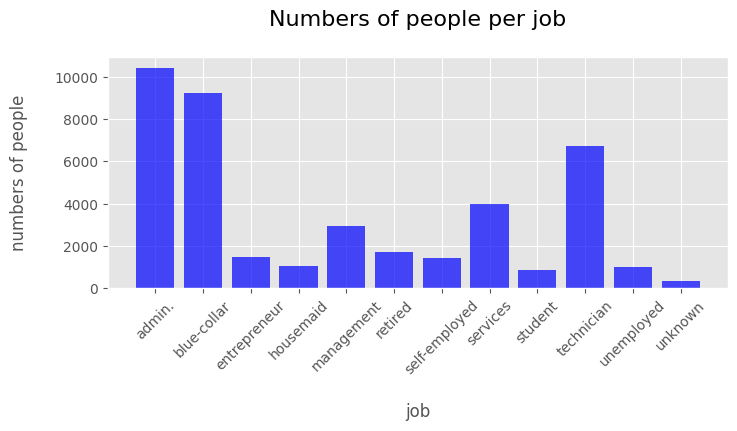

In [36]:
# plotando o gráfico de barras
plt.bar(job_count2['job'], job_count2['count'], 
        color='blue', alpha=0.7)

plt.xlabel('\njob')
plt.ylabel('numbers of people\n')
plt.xticks(rotation=45)
plt.title('Numbers of people per job\n', size=16)
plt.show()

In [37]:
# importando a função da biblioteca "yellowbrick" para visualizar a distribuição dos valores presente em um atributo
from yellowbrick.target import ClassBalance

In [38]:
# realizando a seleção do atributo e transformando em um objeto do tipo Pandas
class_data = df.select('poutcome').toPandas()['poutcome']

In [39]:
# visualizando as 15 últimas observações do objeto
class_data.tail(n=15)

41173        failure
41174        success
41175        failure
41176    nonexistent
41177    nonexistent
41178        success
41179    nonexistent
41180    nonexistent
41181    nonexistent
41182        success
41183    nonexistent
41184    nonexistent
41185    nonexistent
41186    nonexistent
41187        failure
Name: poutcome, dtype: object

In [40]:
print(class_data.unique(), end='\n\n')
class_data.value_counts()

['nonexistent' 'failure' 'success']



poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

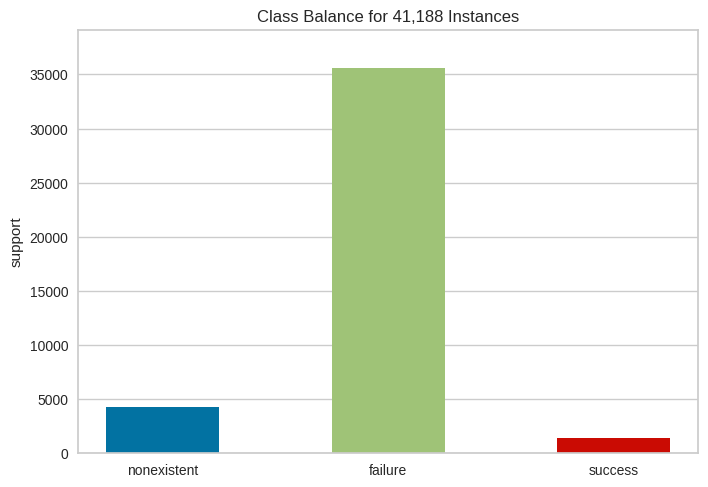

In [42]:
# contabilizando a distribuição dos dados presente na 
viz = ClassBalance(labels=['nonexistent', 'failure', 'success'])

viz.fit(class_data)
viz.show();

In [43]:
# aplicando filtro no atributo "poutcome" e selecionado somente dados diferente de "nonexistent"
df =  df.filter('poutcome != "nonexistent"')

In [44]:
# visualizando o resultado do filtro acima
df.toPandas().head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,38,blue-collar,single,unknown,no,yes,no,telephone,oct,tue,...,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,no
1,40,services,married,high.school,no,yes,no,telephone,oct,tue,...,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,yes
2,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,999,1,failure,-0.1,93.200,-42.0,4.663,5195.8,no
3,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,...,1,999,1,failure,-0.1,93.200,-42.0,4.286,5195.8,yes
4,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no


In [45]:
# agrupando os dados do atributo "poutcome", contabilizando e exibindo o resultado 
df.groupBy('poutcome').count().show()

+--------+-----+
|poutcome|count|
+--------+-----+
| success| 1373|
| failure| 4252|
+--------+-----+



In [46]:
# dimensão do conjunt de dados - linhas e colunas
dataframe_dim(df)

(5625, 21)

In [47]:
# nome dos atributos
df.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [48]:
# selecionando os atributos de entrada
df2 = df.select(
    'age',
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome'
)

In [49]:
# visualizando as 10 primeiras observações
df2.show(n=10)

+---+-------------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+--------+
|age|          job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|
+---+-------------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+--------+
| 38|  blue-collar|  single|            unknown|     no|    yes|  no|telephone|  oct|        tue|      39|       1|  999|       1| failure|
| 40|     services| married|        high.school|     no|    yes|  no|telephone|  oct|        tue|     144|       1|  999|       1| failure|
| 36|       admin.| married|  university.degree|     no|    yes|  no|telephone|  nov|        wed|     449|       1|  999|       1| failure|
| 36|       admin.| married|        high.school|     no|    yes|  no|telephone|  nov|        wed|     114|       1|  999|       1| failure|
| 37|       admin.| 

In [50]:
# importando a função para aplicar tratamento nos dados categóricos
from pyspark.ml.feature import StringIndexer

In [51]:
# instanciando os atributos de entrada e sua saída após o tratamento dos atributos categóricos
indexer = StringIndexer(
    inputCols=[
        'job', 'marital', 'education', 'default', 
        'housing', 'loan', 'contact', 'month', 
        'day_of_week', 
        'poutcome'
    ],
    outputCols=[
        'job_cat', 'marital_cat', 'education_cat', 'default_cat', 
        'housing_cat', 'loan_cat', 'contact_cat', 'month_cat', 
        'day_of_week_cat', 
        'poutcome_cat'
    ]
)

In [52]:
# aplicando o tratamento nos dados categóricos
indexed = indexer.fit(df2).transform(df2)

In [53]:
# visualizando os atributos presente no objeto "indexed" após o tratamento dos dados categóricos
indexed.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'job_cat',
 'marital_cat',
 'education_cat',
 'default_cat',
 'housing_cat',
 'loan_cat',
 'contact_cat',
 'month_cat',
 'day_of_week_cat',
 'poutcome_cat']

In [54]:
# visualizando o esquema do objeto
indexed.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- job_cat: double (nullable = false)
 |-- marital_cat: double (nullable = false)
 |-- education_cat: double (nullable = false)
 |-- default_cat: double (nullable = false)
 |-- housing_cat: double (nullable = false)
 |-- loan_cat: double (nullable = false)
 |-- contact_cat: double (nullable = false)
 |-- month_cat: double (nullable = false)
 |-- day_of_week_cat: double (nullable = false)
 |-- poutcome_cat

In [55]:
# aplicando a seleção somente dos atributos numéricos
df2 = indexed.select(
    'age',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'job_cat',
    'marital_cat',
    'education_cat',
    'default_cat',
    'housing_cat',
    'loan_cat',
    'contact_cat',
    'month_cat',
    'day_of_week_cat',
    'poutcome_cat'
)

In [56]:
# visualizando o objeto
df2.toPandas().head()

,age,duration,campaign,pdays,previous,job_cat,marital_cat,education_cat,default_cat,housing_cat,loan_cat,contact_cat,month_cat,day_of_week_cat,poutcome_cat
0,38,39,1,999,1,1.0,1.0,5.0,0.0,0.0,0.0,1.0,5.0,3.0,0.0
1,40,144,1,999,1,3.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,3.0,0.0
2,36,449,1,999,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0
3,36,114,1,999,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0
4,37,119,1,6,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,1.0


In [57]:
# dimensão
dataframe_dim(df2)

(5625, 15)

In [58]:
# tipo de dados em cada atributo
df2.dtypes

[('age', 'int'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('job_cat', 'double'),
 ('marital_cat', 'double'),
 ('education_cat', 'double'),
 ('default_cat', 'double'),
 ('housing_cat', 'double'),
 ('loan_cat', 'double'),
 ('contact_cat', 'double'),
 ('month_cat', 'double'),
 ('day_of_week_cat', 'double'),
 ('poutcome_cat', 'double')]

In [59]:
# importando a função para realizar a vetorização dos dados
from pyspark.ml.feature import VectorAssembler

In [60]:
# instanciando a função e definindo os parâmetros necessários
data_selection = VectorAssembler(
    inputCols=df2.drop('poutcome_cat').columns,
    outputCol='characteristic_variables'
)

In [61]:
# aplicando a vetorização nos dados selecionados
out = data_selection.transform(df2)

In [62]:
# visualizando o conteúdo do objeto - 3 primeiras observações
out.head(n=3)

24/02/25 21:35:40 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


[Row(age=38, duration=39, campaign=1, pdays=999, previous=1, job_cat=1.0, marital_cat=1.0, education_cat=5.0, default_cat=0.0, housing_cat=0.0, loan_cat=0.0, contact_cat=1.0, month_cat=5.0, day_of_week_cat=3.0, poutcome_cat=0.0, characteristic_variables=DenseVector([38.0, 39.0, 1.0, 999.0, 1.0, 1.0, 1.0, 5.0, 0.0, 0.0, 0.0, 1.0, 5.0, 3.0])),
 Row(age=40, duration=144, campaign=1, pdays=999, previous=1, job_cat=3.0, marital_cat=0.0, education_cat=1.0, default_cat=0.0, housing_cat=0.0, loan_cat=0.0, contact_cat=1.0, month_cat=5.0, day_of_week_cat=3.0, poutcome_cat=0.0, characteristic_variables=DenseVector([40.0, 144.0, 1.0, 999.0, 1.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 5.0, 3.0])),
 Row(age=36, duration=449, campaign=1, pdays=999, previous=1, job_cat=0.0, marital_cat=0.0, education_cat=0.0, default_cat=0.0, housing_cat=0.0, loan_cat=0.0, contact_cat=1.0, month_cat=1.0, day_of_week_cat=4.0, poutcome_cat=0.0, characteristic_variables=SparseVector(14, {0: 36.0, 1: 449.0, 2: 1.0, 3: 999.0, 

In [63]:
# visualizando o tipo do objeto
type(out)

pyspark.sql.dataframe.DataFrame

In [64]:
# instanciando a entrada dos dados para aplicação posteriormente de modelos de aprendizado de máquina
input_data = out.select('characteristic_variables', 
                        'poutcome_cat')

In [65]:
# visualizando as 5 primeiras observações
input_data.head(n=5)

[Row(characteristic_variables=DenseVector([38.0, 39.0, 1.0, 999.0, 1.0, 1.0, 1.0, 5.0, 0.0, 0.0, 0.0, 1.0, 5.0, 3.0]), poutcome_cat=0.0),
 Row(characteristic_variables=DenseVector([40.0, 144.0, 1.0, 999.0, 1.0, 3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 5.0, 3.0]), poutcome_cat=0.0),
 Row(characteristic_variables=SparseVector(14, {0: 36.0, 1: 449.0, 2: 1.0, 3: 999.0, 4: 1.0, 11: 1.0, 12: 1.0, 13: 4.0}), poutcome_cat=0.0),
 Row(characteristic_variables=DenseVector([36.0, 114.0, 1.0, 999.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 4.0]), poutcome_cat=0.0),
 Row(characteristic_variables=SparseVector(14, {0: 37.0, 1: 119.0, 2: 1.0, 3: 6.0, 4: 1.0, 11: 1.0, 12: 1.0, 13: 4.0}), poutcome_cat=1.0)]

In [66]:
# utilizando o método ".show()" para visualizar os dados de entrada e saída
input_data.show()

+------------------------+------------+
|characteristic_variables|poutcome_cat|
+------------------------+------------+
|    [38.0,39.0,1.0,99...|         0.0|
|    [40.0,144.0,1.0,9...|         0.0|
|    (14,[0,1,2,3,4,11...|         0.0|
|    [36.0,114.0,1.0,9...|         0.0|
|    (14,[0,1,2,3,4,11...|         1.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    [42.0,200.0,1.0,9...|         0.0|
|    [34.0,303.0,1.0,9...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    [51.0,324.0,1.0,9...|         0.0|
|    (14,[0,1,2,3,4,10...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    [44.0,115.0,1.0,9...|         0.0|
|    [36.0,68.0,1.0,99...|         0.0|
|    [50.0,134.0,1.0,9...|         0.0|
|    [41.0,297.0,1.0,9...|         0.0|
|    [50.0,120.0,1.0,9...|         0.0|
|    [43.0,75.0,1.0,99...|         0.0|
|    [31.0,396.0,1.0,9...|         0.0|
|    (14,[0,1,2,3,4,12...|         0.0|
+------------------------+------------+
only showing top 20 rows



In [67]:
# instanciando os dados de treino e validação
(train_data, val_data) = input_data.randomSplit(
    weights=[0.75, 0.25], seed=1522
)

In [69]:
# visualizando o conteúdo do objeto "train_data"
train_data.show()

+------------------------+------------+
|characteristic_variables|poutcome_cat|
+------------------------+------------+
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
+------------------------+------------+
only showing top 20 rows



In [70]:
# visualizando o conteúdo do objeto "val_data"
val_data.show()

+------------------------+------------+
|characteristic_variables|poutcome_cat|
+------------------------+------------+
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
|    (14,[0,1,2,3,4,5,...|         1.0|
|    (14,[0,1,2,3,4,5,...|         0.0|
+------------------------+------------+
only showing top 20 rows



In [72]:
# importando as funções de modelos de aprendizado de máquina
from pyspark.ml.classification import (LogisticRegression, 
                                       DecisionTreeClassifier,
                                       RandomForestClassifier, 
                                       NaiveBayes)

In [73]:
# instanciando os modelos

# regressão logística
mdl_logReg = LogisticRegression(
    featuresCol='characteristic_variables',
    labelCol='poutcome_cat'
)

# árvore de decisão
mdl_decTree = DecisionTreeClassifier(
    featuresCol='characteristic_variables',
    labelCol='poutcome_cat'
)

# floresta randômica
mdl_randFor = RandomForestClassifier(
    featuresCol='characteristic_variables',
    labelCol='poutcome_cat'
)

# naive bayes
mdl_nBayes = NaiveBayes(
    featuresCol='characteristic_variables',
    labelCol='poutcome_cat'
)

In [74]:
# aplicando o treinamento dos modelos
mdl_training_logReg = mdl_logReg.fit(train_data)
mdl_training_decTree = mdl_decTree.fit(train_data)
mdl_training_randFor = mdl_randFor.fit(train_data)
mdl_training_nBayes = mdl_nBayes.fit(train_data)

In [75]:
# aplicando o modelo treinado nos dados de validação
pred_logReg = mdl_training_logReg.transform(val_data)
pred_decTree = mdl_training_decTree.transform(val_data)
pred_randFor = mdl_training_randFor.transform(val_data)
pred_nBayes = mdl_training_nBayes.transform(val_data)

In [76]:
# visualizando as 10 primeiras predições do modelo de regressão logística
pred_logReg.show(n=10)

+------------------------+------------+--------------------+-----------+----------+
|characteristic_variables|poutcome_cat|       rawPrediction|probability|prediction|
+------------------------+------------+--------------------+-----------+----------+
|    (14,[0,1,2,3,4,5,...|         0.0|[340.033676815626...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[339.914770644160...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[340.096393421201...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[340.018074044485...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[340.076511051763...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[340.283417556996...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[340.470456660706...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[339.978606038139...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[340.058978036345...|  [1.0,0.0]|    

In [77]:
# visualizando as 10 primeiras predições do modelo de árvore de decisão
pred_decTree.show(n=10)

+------------------------+------------+-------------+-----------+----------+
|characteristic_variables|poutcome_cat|rawPrediction|probability|prediction|
+------------------------+------------+-------------+-----------+----------+
|    (14,[0,1,2,3,4,5,...|         0.0| [3108.0,0.0]|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3108.0,0.0]|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3108.0,0.0]|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3108.0,0.0]|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3108.0,0.0]|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3108.0,0.0]|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3108.0,0.0]|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3108.0,0.0]|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3108.0,0.0]|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0| [3108.0,0.0]|  [1.0,0.0]|       0.0|

In [78]:
# visualizando as 10 primeiras predições do modelo de floresta aleatória
pred_randFor.show(n=10)

+------------------------+------------+--------------------+--------------------+----------+
|characteristic_variables|poutcome_cat|       rawPrediction|         probability|prediction|
+------------------------+------------+--------------------+--------------------+----------+
|    (14,[0,1,2,3,4,5,...|         0.0|[18.3182051225232...|[0.91591025612616...|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[19.3108964068467...|[0.96554482034233...|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[19.4502627428139...|[0.97251313714069...|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[18.6045320246942...|[0.93022660123471...|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[18.8543194871427...|[0.94271597435713...|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[19.5606734370590...|[0.97803367185295...|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[19.4404493001205...|[0.97202246500602...|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[19.2457112216615...|[0.9622855

In [79]:
# visualizando as 10 primeiras predições do modelo de naive bayes
pred_nBayes.show(n=10)

+------------------------+------------+--------------------+-----------+----------+
|characteristic_variables|poutcome_cat|       rawPrediction|probability|prediction|
+------------------------+------------+--------------------+-----------+----------+
|    (14,[0,1,2,3,4,5,...|         0.0|[-912.12284687536...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[-549.28378260911...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[-664.73738202033...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[-734.70391646260...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[-821.79466092492...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[-689.67441529997...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[-594.06586457107...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[-627.33374996184...|  [1.0,0.0]|       0.0|
|    (14,[0,1,2,3,4,5,...|         0.0|[-756.79130449304...|  [1.0,0.0]|    

In [80]:
# importando função para avaliação dos modelos
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [81]:
# instanciando o objeto avaliador e seus parâmetros
eval = MulticlassClassificationEvaluator(
    predictionCol='prediction',
    labelCol='poutcome_cat',
    metricName='accuracy'
)

In [82]:
# aplicando o avaliador nos modelos
acc_logReg = eval.evaluate(dataset=pred_logReg)
acc_decTree = eval.evaluate(dataset=pred_decTree)
acc_randFor = eval.evaluate(dataset=pred_randFor)
acc_nBayes = eval.evaluate(dataset=pred_nBayes)

In [83]:
# imprimindo o resultado da acurácia dos modelos
print('\t[ACCURACY]')
print('=' * 30)
print(f'Logistic Regression: {(acc_logReg * 100):.4f}%')
print(f'Decision Tree      : {(acc_decTree * 100):.4f}%')
print(f'Random Forest      : {(acc_randFor * 100):.4f}%')
print(f'Naive Bayes        : {(acc_nBayes * 100):.4f}%')

	[ACCURACY]
Logistic Regression: 97.4982%
Decision Tree      : 98.1415%
Random Forest      : 97.5697%
Naive Bayes        : 97.4267%


In [84]:
# importando as funções do "sckit-learn" para auxiliar na visualização das métricas
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [85]:
# realizando a seleção dos dados em cada modelo
df_pred_logReg = pred_logReg.select(
    'prediction', 'poutcome_cat'
).toPandas()

df_pred_decTree = pred_decTree.select(
    'prediction', 'poutcome_cat'
).toPandas()

df_pred_randFor = pred_randFor.select(
    'prediction', 'poutcome_cat'
).toPandas()

df_pred_nBayes = pred_nBayes.select(
    'prediction', 'poutcome_cat'
).toPandas()

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1038
         1.0       0.93      0.97      0.95       361

    accuracy                           0.97      1399
   macro avg       0.96      0.97      0.97      1399
weighted avg       0.98      0.97      0.98      1399

[[1013   25]
 [  10  351]]



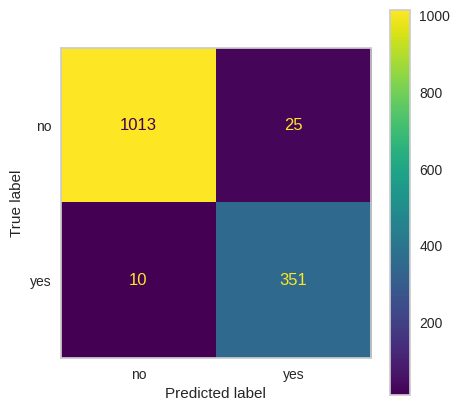

In [86]:
# calculando a matriz de confusão, exibindo o relatório do modelo e o resultado da matriz de confusão
conf_mat_logReg = confusion_matrix(
    y_true=df_pred_logReg['poutcome_cat'],
    y_pred=df_pred_logReg['prediction']
)

print(classification_report(y_true=df_pred_logReg['poutcome_cat'], 
                            y_pred=df_pred_logReg['prediction']))

print(conf_mat_logReg, end='\n\n')

cm = ConfusionMatrixDisplay(conf_mat_logReg, 
                            display_labels=['no', 'yes'])

fig, ax = plt.subplots(figsize=(5, 5))

ax.grid(False)
cm.plot(ax=ax);

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1038
         1.0       0.97      0.95      0.96       361

    accuracy                           0.98      1399
   macro avg       0.98      0.97      0.98      1399
weighted avg       0.98      0.98      0.98      1399

[[1029    9]
 [  17  344]]



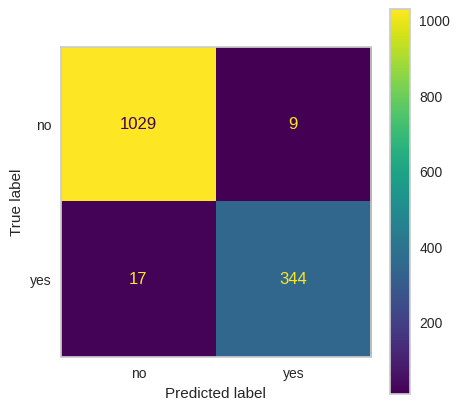

In [87]:
conf_mat_decTree = confusion_matrix(
    y_true=df_pred_decTree['poutcome_cat'],
    y_pred=df_pred_decTree['prediction']
)

print(classification_report(y_true=df_pred_decTree['poutcome_cat'], 
                            y_pred=df_pred_decTree['prediction']))

print(conf_mat_decTree, end='\n\n')

cm = ConfusionMatrixDisplay(conf_mat_decTree, 
                            display_labels=['no', 'yes'])

fig, ax = plt.subplots(figsize=(5, 5))

ax.grid(False)
cm.plot(ax=ax);

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1038
         1.0       0.93      0.98      0.95       361

    accuracy                           0.98      1399
   macro avg       0.96      0.98      0.97      1399
weighted avg       0.98      0.98      0.98      1399

[[1012   26]
 [   8  353]]



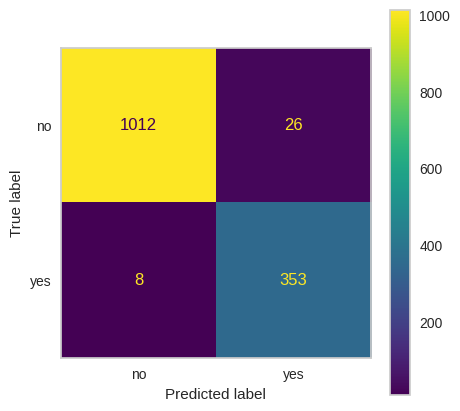

In [88]:
conf_mat_randFor = confusion_matrix(
    y_true=df_pred_randFor['poutcome_cat'],
    y_pred=df_pred_randFor['prediction']
)

print(classification_report(y_true=df_pred_randFor['poutcome_cat'], 
                            y_pred=df_pred_randFor['prediction']))

print(conf_mat_randFor, end='\n\n')

cm = ConfusionMatrixDisplay(conf_mat_randFor, 
                            display_labels=['no', 'yes'])

fig, ax = plt.subplots(figsize=(5, 5))

ax.grid(False)
cm.plot(ax=ax);

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1038
         1.0       0.91      1.00      0.95       361

    accuracy                           0.97      1399
   macro avg       0.95      0.98      0.97      1399
weighted avg       0.98      0.97      0.97      1399

[[1002   36]
 [   0  361]]



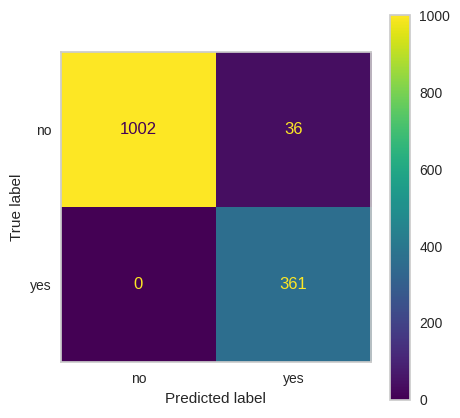

In [89]:
conf_mat_nBayes = confusion_matrix(
    y_true=df_pred_nBayes['poutcome_cat'],
    y_pred=df_pred_nBayes['prediction']
)

print(classification_report(y_true=df_pred_nBayes['poutcome_cat'], 
                            y_pred=df_pred_nBayes['prediction']))

print(conf_mat_nBayes, end='\n\n')

cm = ConfusionMatrixDisplay(conf_mat_nBayes, 
                            display_labels=['no', 'yes'])

fig, ax = plt.subplots(figsize=(5, 5))

ax.grid(False)
cm.plot(ax=ax);

In [90]:
# visualizando as variáveis de ambiente
%whos

Variable                            Type                                 Data/Info
----------------------------------------------------------------------------------
ClassBalance                        type                                 <class 'yellowbrick.targe<...>ss_balance.ClassBalance'>
ConfusionMatrixDisplay              type                                 <class 'sklearn.metrics._<...>.ConfusionMatrixDisplay'>
DecisionTreeClassifier              ABCMeta                              <class 'pyspark.ml.classi<...>.DecisionTreeClassifier'>
LogisticRegression                  ABCMeta                              <class 'pyspark.ml.classi<...>tion.LogisticRegression'>
MulticlassClassificationEvaluator   ABCMeta                              <class 'pyspark.ml.evalua<...>ClassificationEvaluator'>
NaiveBayes                          ABCMeta                              <class 'pyspark.ml.classification.NaiveBayes'>
RandomForestClassifier              ABCMeta                          